In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import itertools
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Binarizer
# Load the dataset
data = pd.read_csv('Premier_data_cleaned.csv')

# Display basic information and first few rows of the dataset
print(data.info())
print(data.describe())
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              416 non-null    object 
 1   Team                160 non-null    object 
 2   rank                412 non-null    float64
 3   points              412 non-null    float64
 4   members             412 non-null    float64
 5   foreign_players     412 non-null    float64
 6   mean_age            412 non-null    float64
 7   salaries            416 non-null    int64  
 8   spending            416 non-null    int64  
 9   Mean_Player_Rating  160 non-null    float64
 10  Wins                160 non-null    float64
 11  Draws               160 non-null    float64
 12  Losses              160 non-null    float64
 13  Goals_For           160 non-null    float64
 14  Goals_Against       160 non-null    float64
 15  Goal_Difference     160 non-null    float64
dtypes: float

,Season,Team,rank,points,members,foreign_players,mean_age,salaries,spending,Mean_Player_Rating,Wins,Draws,Losses,Goals_For,Goals_Against,Goal_Difference
0,2015-2016,Leicester,1.0,81.0,36.0,18.0,24.7,0,36800000,6.1,23.0,12.0,3.0,68.0,36.0,32.0
1,2015-2016,Arsenal,2.0,71.0,44.0,30.0,22.9,0,24100000,6.5,20.0,11.0,7.0,65.0,36.0,29.0
2,2015-2016,Tottenham,3.0,70.0,34.0,16.0,22.6,0,67000000,6.1,19.0,13.0,6.0,69.0,35.0,34.0
3,2015-2016,Manchester City,4.0,66.0,56.0,41.0,23.2,582000,196320000,6.3,19.0,9.0,10.0,71.0,41.0,30.0
4,2015-2016,Manchester United,5.0,66.0,50.0,27.0,22.3,1840000,146000000,6.0,19.0,9.0,10.0,49.0,35.0,14.0


In [2]:
# Get unique seasons
seasons = data['Season'].unique()

# Create combinations of all pairs of seasons
season_pairs = list(itertools.combinations(seasons, 2))

# Perform T-tests for each pair
results = []
for pair in season_pairs:
    data1 = data[data['Season'] == pair[0]]['points'].dropna()
    data2 = data[data['Season'] == pair[1]]['points'].dropna()
    
    # Compute the T-test
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
    
    # Append results
    results.append({
        'Season Pair': f"{pair[0]} vs {pair[1]}",
        'T-Statistic': t_stat,
        'P-Value': p_val
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                                           Season Pair  T-Statistic   P-Value
0                               2015-2016 vs 2016-2017    -0.204510  0.839112
1                               2015-2016 vs 2017-2018    -0.072675  0.942463
2                               2015-2016 vs 2018-2019    -0.308775  0.759329
3                               2015-2016 vs 2019-2020    -0.142466  0.887479
4                               2015-2016 vs 2020-2021    -0.234544  0.815832
..                                                 ...          ...       ...
775    Watford_summary_stats vs West Ham_summary_stats    -0.970790  0.349052
776  Watford_summary_stats vs Wolverhampton_summary...    -0.909934  0.379298
777  West Bromwich Albion_summary_stats vs West Ham...    -1.223593  0.243148
778  West Bromwich Albion_summary_stats vs Wolverha...    -1.156716  0.268780
779  West Ham_summary_stats vs Wolverhampton_summar...     0.041459  0.967516

[780 rows x 3 columns]


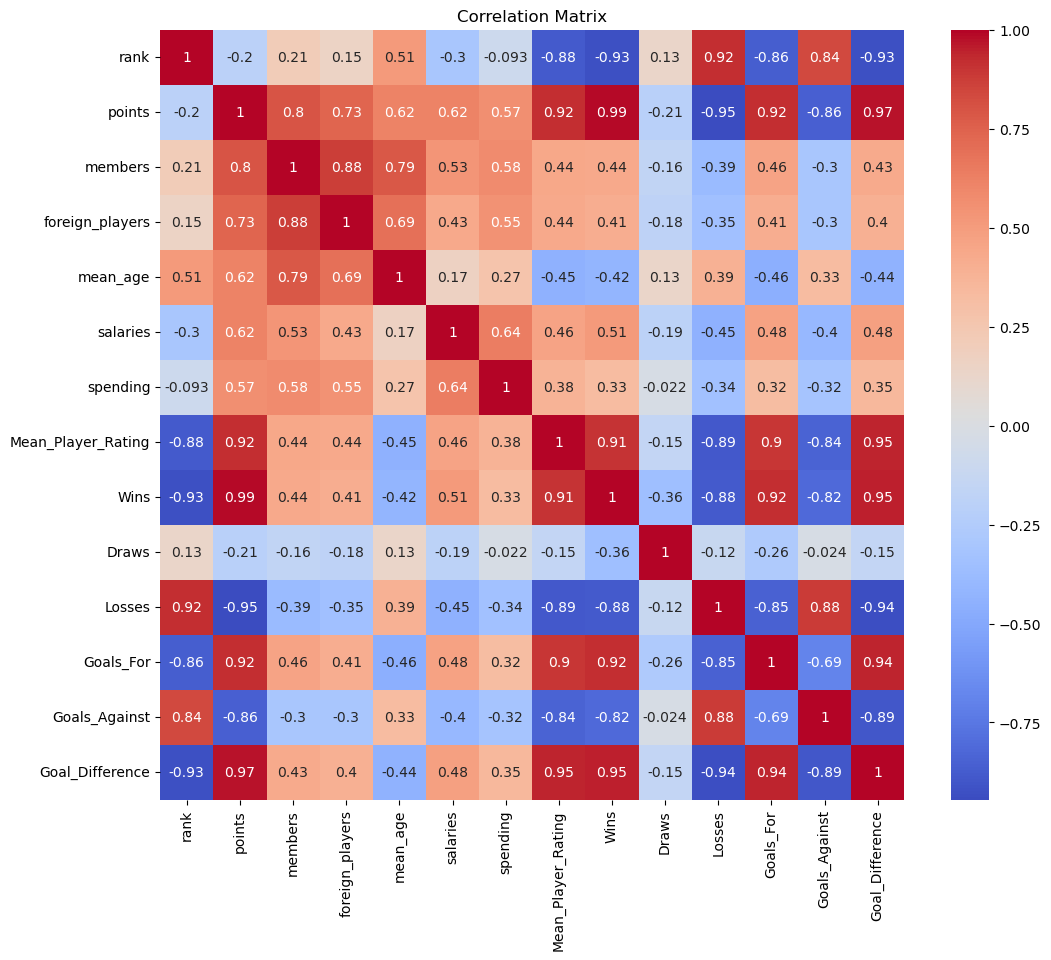

In [3]:
# Filter out non-numeric columns before calculating the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # This will select only numeric columns

# Now you can safely compute the correlation matrix and display it
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [67]:
# Prepare data for model
X = data.drop(['Season', 'Team', 'points'], axis=1)
y = data['points']
X = X.apply(LabelEncoder().fit_transform)

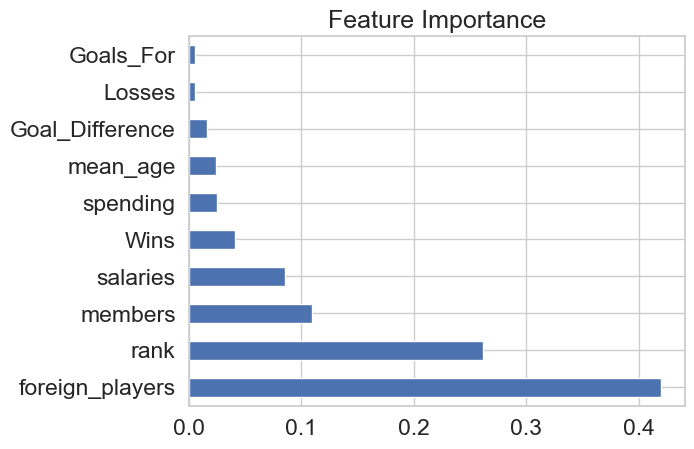

In [68]:
# Random Forest to determine feature importance
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)
features = pd.Series(forest.feature_importances_, index=X.columns)
top_features = features.nlargest(10)
top_features.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

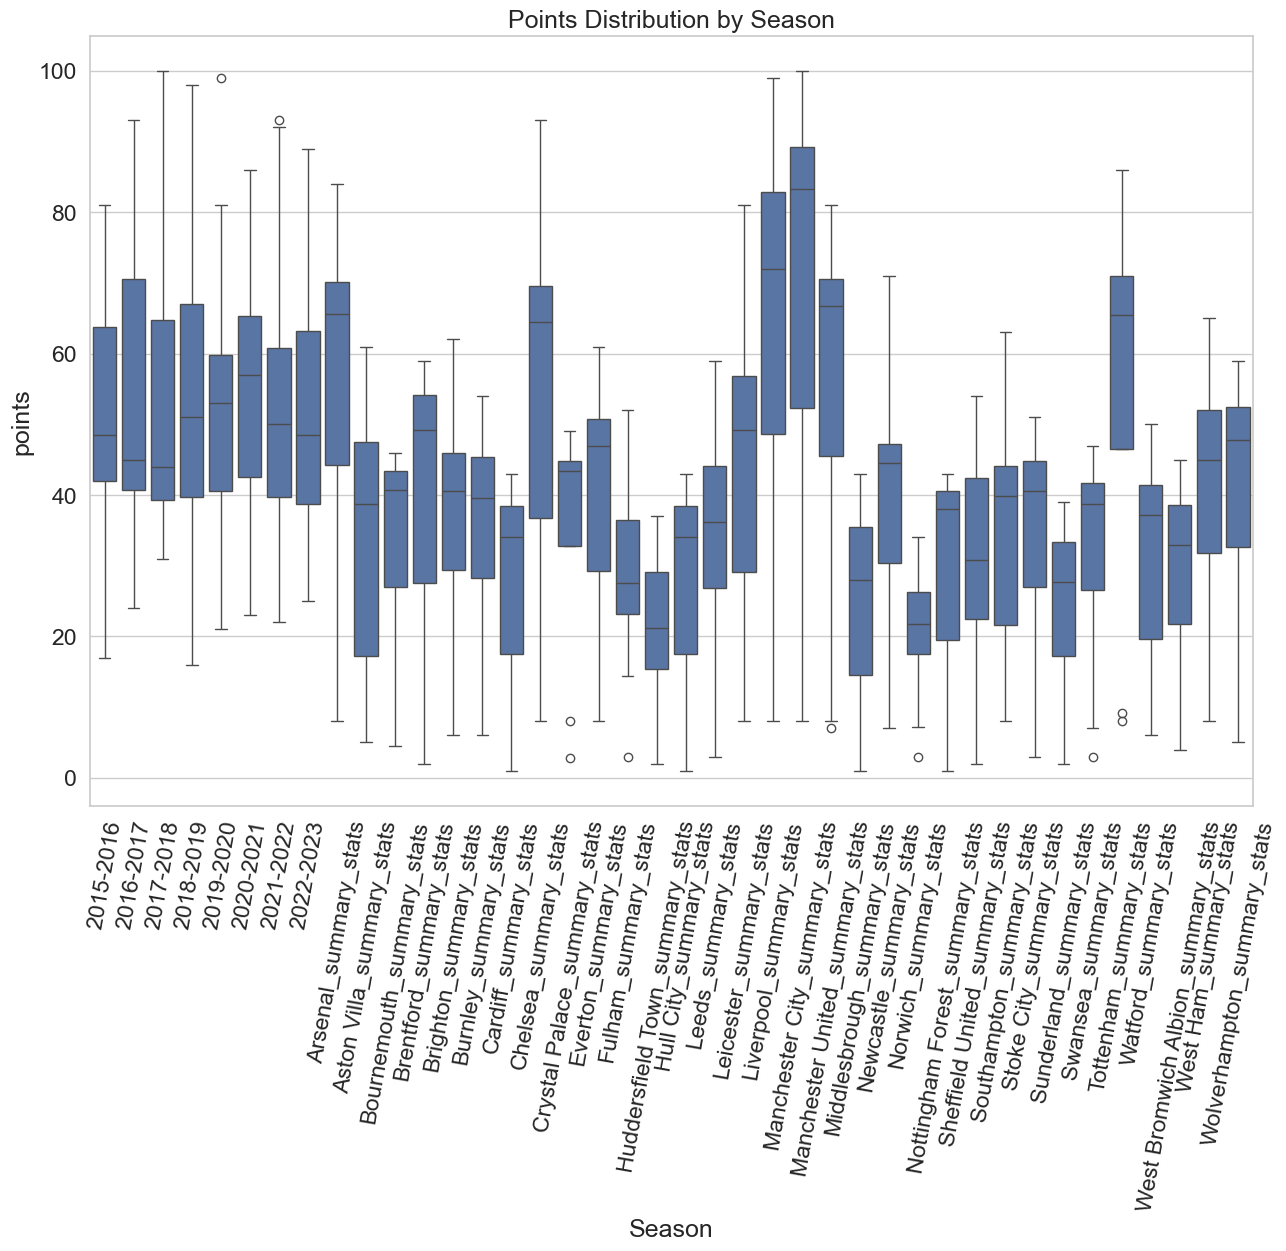

In [69]:
# Adjusting the size of the plot
plt.figure(figsize=(15, 10))  # Increase the width to 20 inches
sns.boxplot(x='Season', y='points', data=data)
plt.title('Points Distribution by Season')
plt.xticks(rotation=80)  # Adjust rotation if necessary
plt.show()


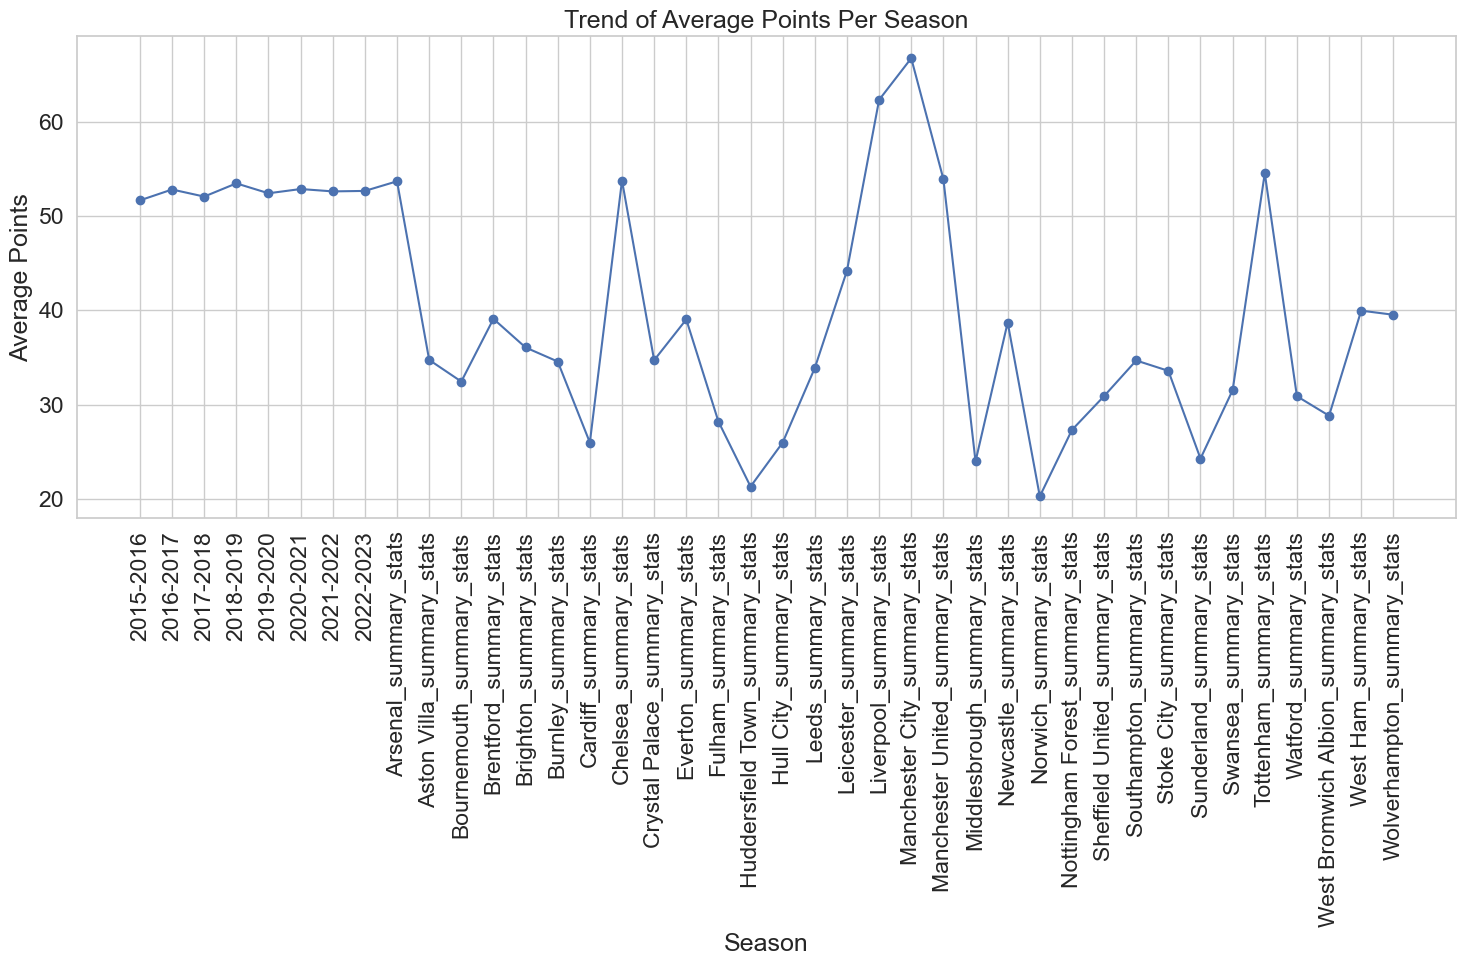

In [70]:
# Group data by 'Season' and calculate the average points
season_avg_points = data.groupby('Season')['points'].mean().reset_index()

# Set the size of the plot to be wider and taller
plt.figure(figsize=(15, 10))  # Adjusted dimensions
plt.plot(season_avg_points['Season'], season_avg_points['points'], marker='o', linestyle='-', color='b')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.title('Trend of Average Points Per Season')
plt.xticks(rotation=90)  # Rotate labels to 90 degrees for better readability
plt.grid(True)  # Optional: Adds a grid
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

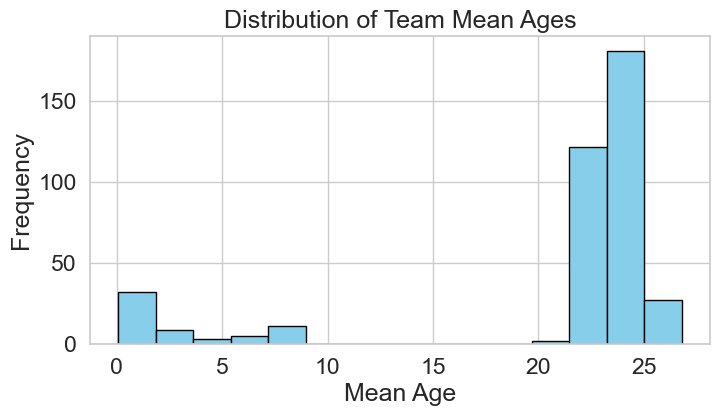

In [71]:
#Explore the distribution of team ages.
plt.figure(figsize=(8, 4))
plt.hist(data['mean_age'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.title('Distribution of Team Mean Ages')
plt.show()


C:\User\saova\desktop\envs\ooujee\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


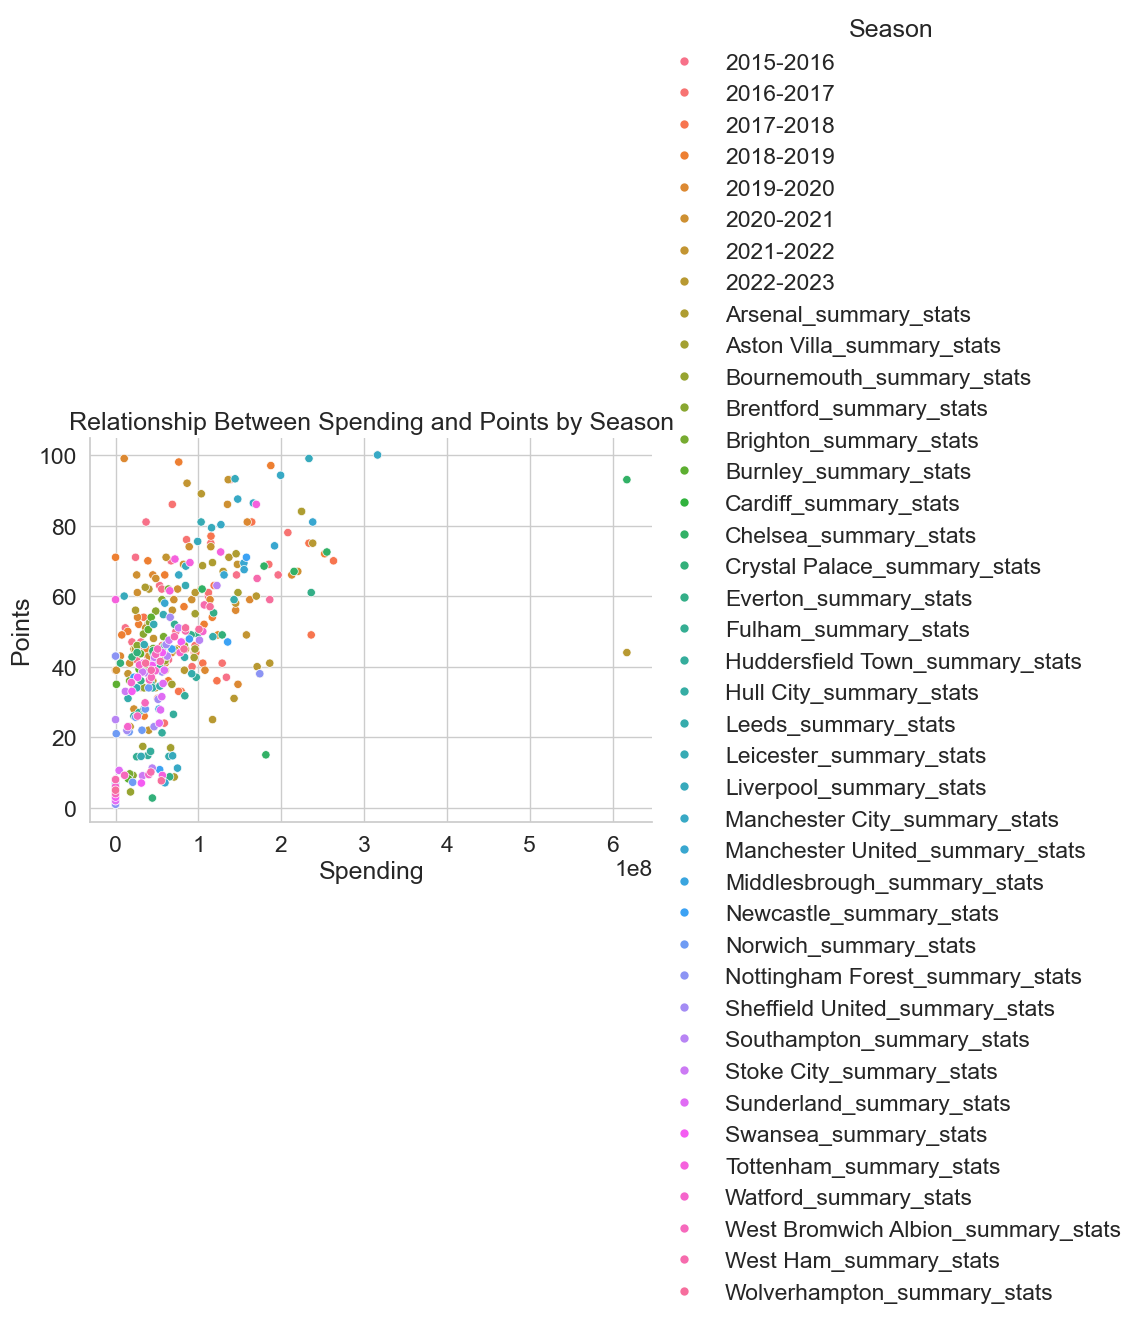

In [72]:
#Explore the relationship between spending and points.
sns.relplot(x='spending', y='points', data=data, kind='scatter', hue='Season', aspect=1.5)
plt.xlabel('Spending')
plt.ylabel('Points')
plt.title('Relationship Between Spending and Points by Season')
plt.show()

C:\User\saova\desktop\envs\ooujee\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


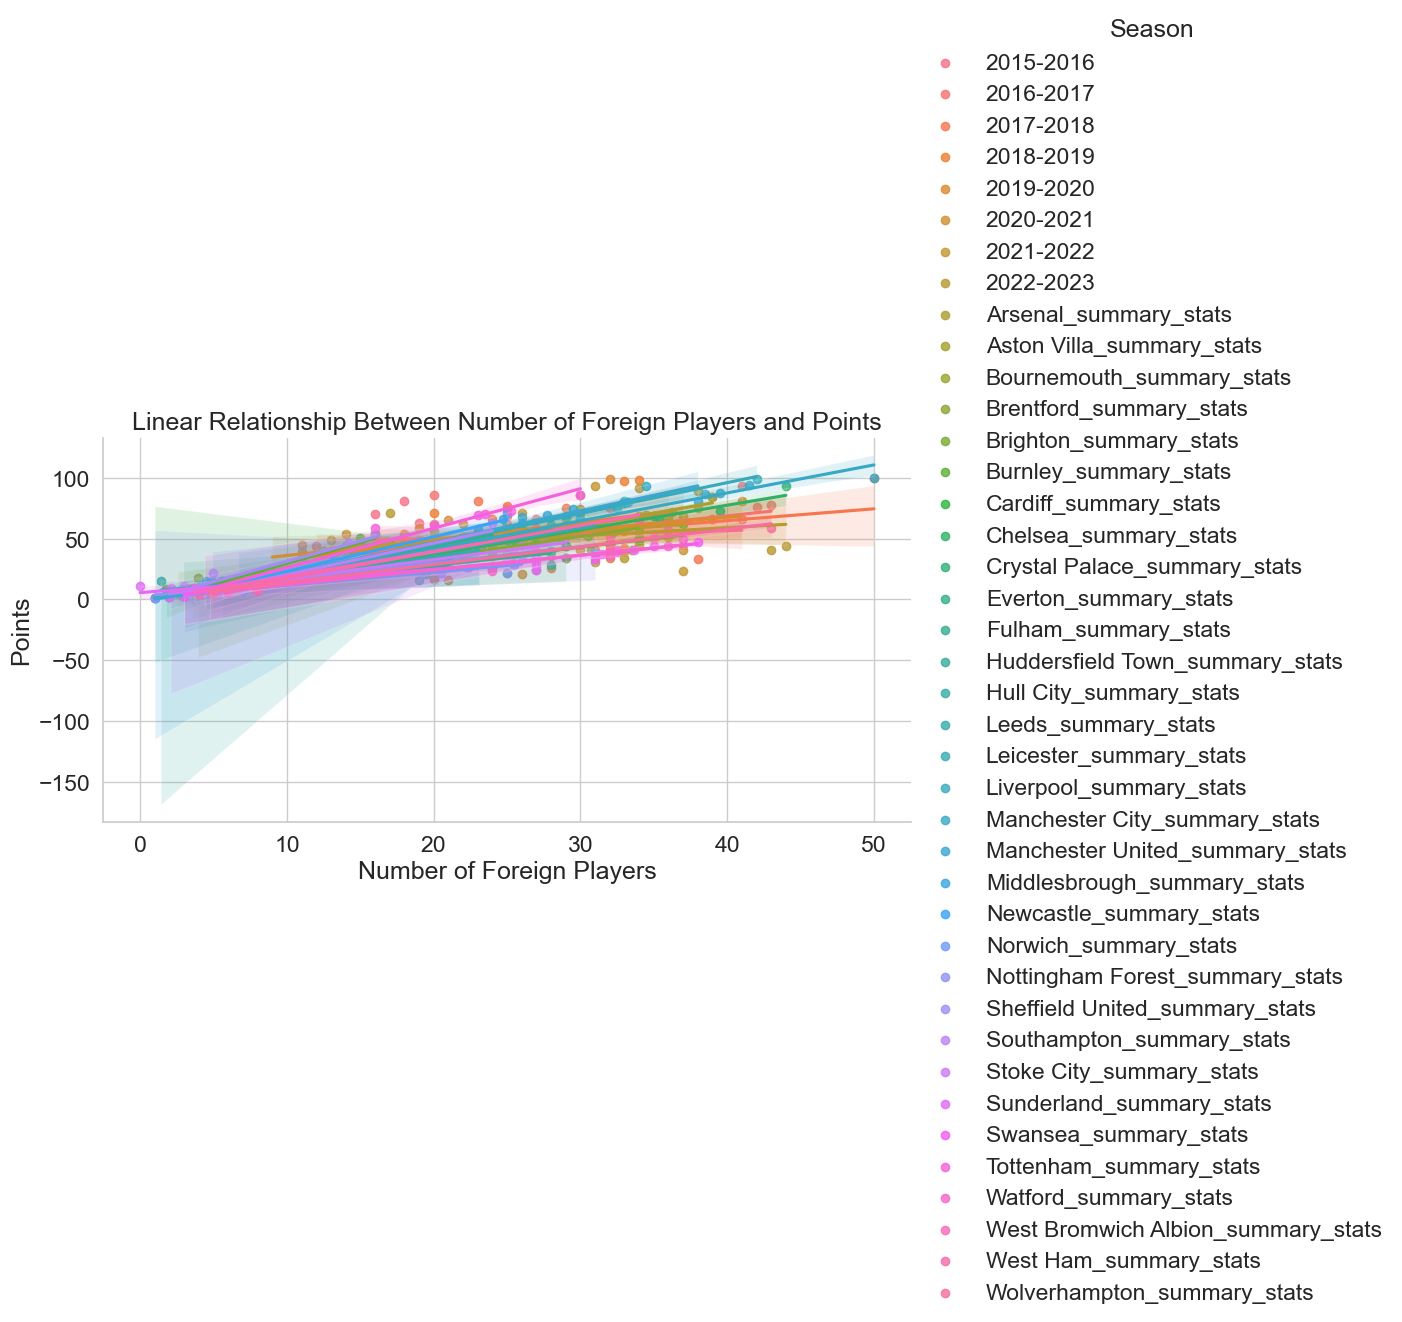

In [73]:
#Visualize the linear relationship between the number of foreign players and points, categorized by season.
sns.lmplot(x='foreign_players', y='points', data=data, hue='Season', height=5, aspect=2)
plt.xlabel('Number of Foreign Players')
plt.ylabel('Points')
plt.title('Linear Relationship Between Number of Foreign Players and Points')
plt.show()

C:\User\saova\desktop\envs\ooujee\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


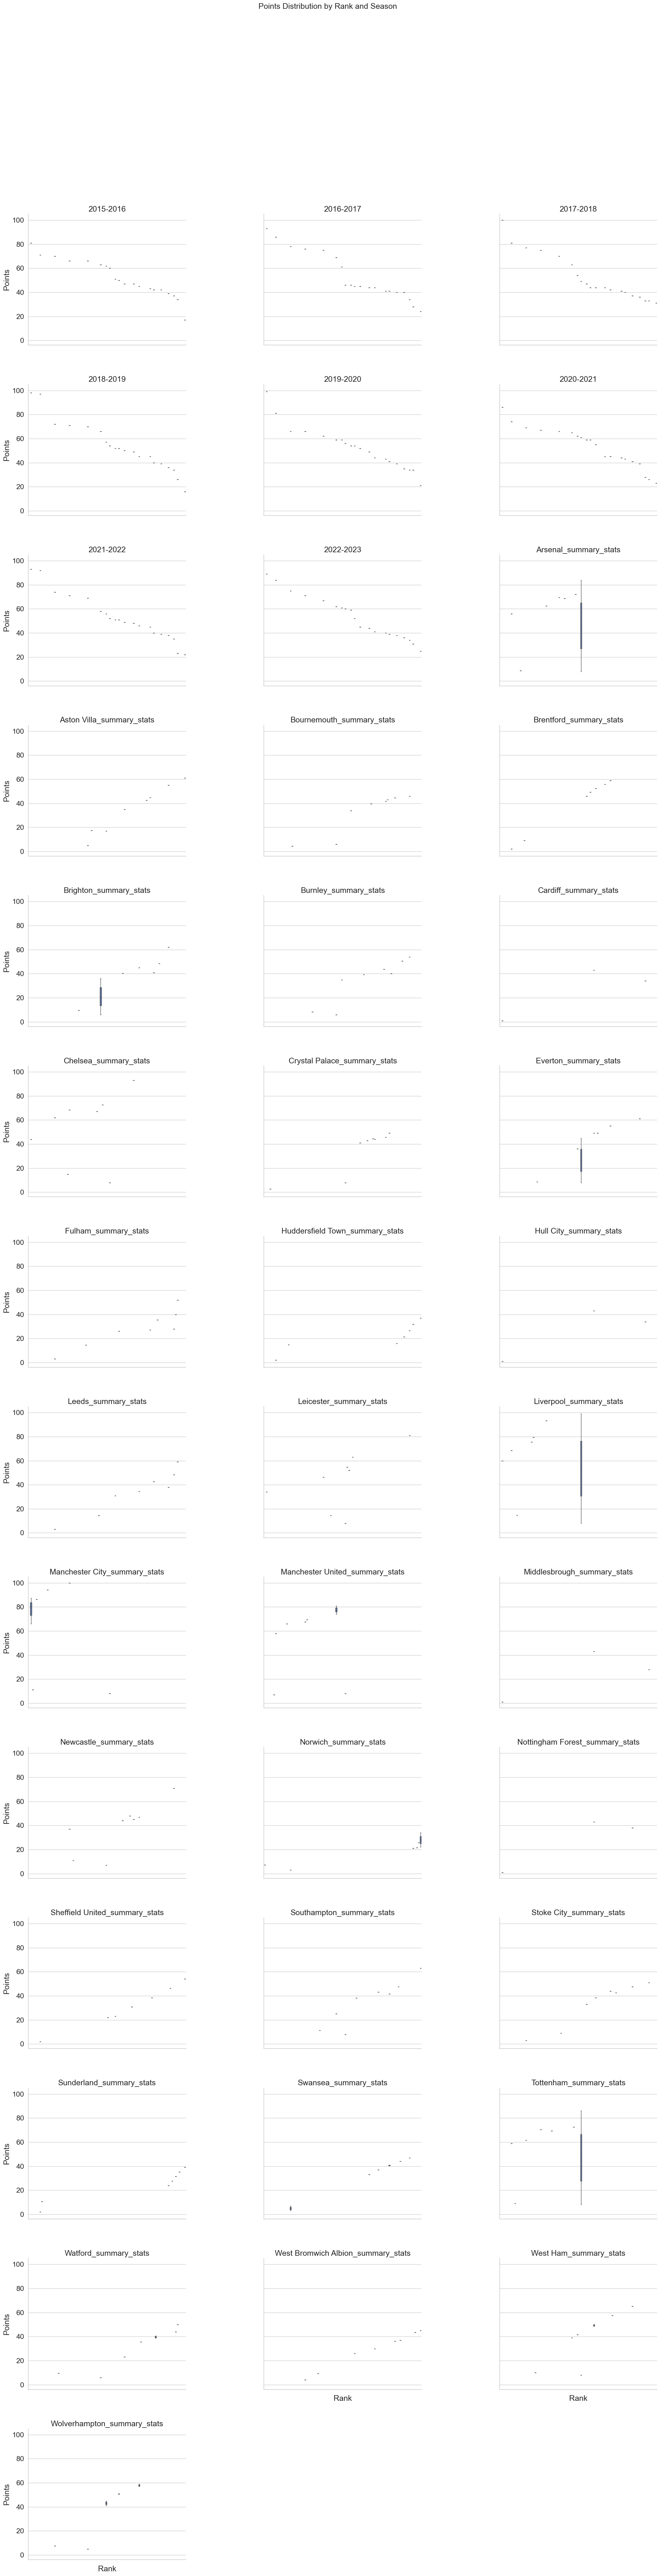

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid", font_scale=1.5)  # Increase the base font scale for better readability

# Create the catplot with increased height, aspect ratio, and fewer columns per row
cat_plot = sns.catplot(
    x='rank', 
    y='points', 
    data=data, 
    kind='box', 
    col='Season', 
    col_wrap=3,  # Fewer columns per row
    height=6,  # Increased height of each plot
    aspect=1.2  # Wider plots to allow for more space horizontally
)

# Improve the titles and labels for clarity
cat_plot.set_titles("{col_name}")  # Simplify titles to just the season name
cat_plot.set_axis_labels("Rank", "Points")  # Ensure axis labels are clear
cat_plot.set_xticklabels(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust spacing between plots to prevent label overlap and adjust the overall layout
plt.subplots_adjust(hspace=0.3, top=0.9)  # Adjust the vertical spacing and top margin
cat_plot.fig.suptitle('Points Distribution by Rank and Season', fontsize=18)  # Main title with increased font size

# Render the plot
plt.show()


In [75]:
# 1. Handling Categorical Features: One-hot Encoding
# Assuming 'Season' and 'Team' are categorical features
data = pd.get_dummies(data, columns=['Season', 'Team'])

# 2. Handling Missing Data
# Imputation with median for numeric columns
for column in ['points', 'mean_age', 'foreign_players']:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

# Replace missing values in categorical data with the mode
for column in data.select_dtypes(include='object').columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].mode()[0], inplace=True)

# 3. Feature Transformation
# Binarization: Creating a binary variable from 'points'
binarizer = Binarizer(threshold=float(data['points'].mean()))
data['high_point'] = binarizer.fit_transform(data['points'].values.reshape(-1, 1))

# Log Transformation: Apply to 'spending' to reduce skewness
data['log_spending'] = np.log1p(data['spending'])

# Standardization: Normalize 'points' using StandardScaler
scaler = StandardScaler()
data['normalized_points'] = scaler.fit_transform(data['points'].values.reshape(-1, 1))

# 4. Handling Outliers: Remove outliers using z-score for 'points'
data = data[(np.abs(stats.zscore(data['points'])) < 3)]

# Save the cleaned and engineered dataset
data.to_csv('EPL_cleaned_data.csv', index=False)

print("Feature engineering and selection steps completed and data saved.")

Feature engineering and selection steps completed and data saved.


##Conclusion
Predict which team is most likely to win the 2023-2024 Premier League season based on historical data.Analyze trends from the past seasons focusing on features like points, goal difference, wins, and spending, as these are typically strong indicators of a team's performance.also consider calculating aggregate statistics such as average points, average goal difference, and total spending in the last few seasons for each team. This should give us insight into which teams have consistently performed well and invested heavily in their squads, both factors that could indicate potential championship contenders.
Based on the analysis of the most recent three seasons in the dataset, here are the insights and prediction so far before we move to next step: Arsenal has emerged as the top contender according to the data. They have the highest average points and have consistently finished in the top 4 in each of the considered seasons. Despite a negative average goal difference, their consistent point accumulation and frequent top-tier finishes indicate strong overall performance. Additionally, their substantial investment in player transfers, as reflected by their total spending, suggests a significant commitment to strengthening the team.
